<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 例題9.1

scikit-learn付属のirisデータについて、[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)で学習した結果を分割学習法と交差確認法で評価し、評価法の特性を把握せよ。

データの準備と表示

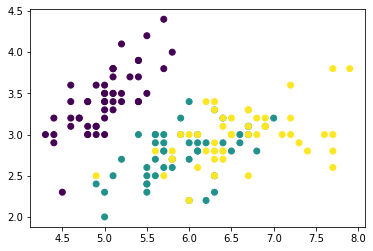

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
X = iris.data  #特徴は4次元
y = iris.target #クラスは3つ
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

分割学習法

データを分割するメソッド [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) は、実行毎に乱数で分割を変える。分割を変えて評価を何度か実行せよ。

In [2]:
from sklearn.model_selection import train_test_split





交差確認法

交差確認法に用いる分割は、[StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html)（実行毎に乱数で分割を変えるが、分割内のクラスの割合は元データと同じ）を用いて行う。分割数を変えて分割学習法自体を何度か実行して評価値のぶれを観察せよ。

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit


## 特徴空間の評価

クラス内分散・クラス間分散比を用いて、irisデータにおける識別に適した2次元を求めよ。ただし、評価に先立ってデータの標準化を行うこと。

## ハイパーパラメータの調整

scikit-learnの [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) を用いたirisデータの識別において、ハイパーパラメータのひとつである多項式カーネルの次数を変化させて性能との関係を確認せよ。

# 解答例

分割学習法

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data  #特徴は4次元
y = iris.target #クラスは3つ

for _ in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
  clf = SVC()
  clf.fit(X_train, y_train)
  print(f'accuracy = {clf.score(X_test, y_test):.2}')

accuracy = 0.97
accuracy = 0.97
accuracy = 0.93
accuracy = 0.91
accuracy = 0.97
accuracy = 0.93
accuracy = 0.95
accuracy = 0.96
accuracy = 0.88
accuracy = 0.97


交差確認法

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

iris = load_iris()
X = iris.data  #特徴は4次元
y = iris.target #クラスは3つ

for _ in range(10):
    clf = SVC()
    cv = StratifiedShuffleSplit(n_splits=10)  # n_splits （分割）の値を変化させて安定性を観察
    score = cross_val_score(clf, X, y, cv=cv)
    print(f'mean accuracy = {np.mean(score):.2}')

mean accuracy = 0.97
mean accuracy = 0.96
mean accuracy = 0.97
mean accuracy = 0.96
mean accuracy = 0.99
mean accuracy = 0.95
mean accuracy = 0.93
mean accuracy = 0.96
mean accuracy = 0.97
mean accuracy = 0.97


特徴の評価

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

def wcbc(d1, d2):
  X2 = Xs[:,[d1,d2]]
  num = len(iris.target_names)
  wc = sum([np.var(X2[y==t]) for t in range(num)])
  bc = sum([np.linalg.norm(np.average(X2[y==t], axis=0)) for t in range(num)])
  return bc/wc

for f1 in range(len(iris.feature_names)-1):
  for f2 in range(f1+1, len(iris.feature_names)):
    print(f'J of "{iris.feature_names[f1]}" and "{iris.feature_names[f2]}" is {wcbc(f1, f2)}')

J of "sepal length (cm)" and "sepal width (cm)" is 1.0455335234672558
J of "sepal length (cm)" and "petal length (cm)" is 4.8000892128121935
J of "sepal length (cm)" and "petal width (cm)" is 4.5959380880607865
J of "sepal width (cm)" and "petal length (cm)" is 1.2096006707003915
J of "sepal width (cm)" and "petal width (cm)" is 1.2249836359684956
J of "petal length (cm)" and "petal width (cm)" is 18.166816112687126


ハイパーパラメータ調整

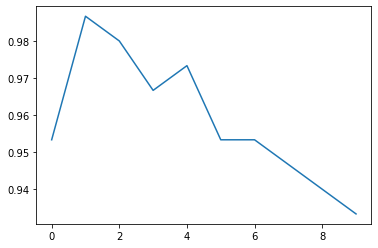

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

svc = SVC(kernel='poly')
clf = GridSearchCV(svc, {'degree': range(1,11)})
clf.fit(iris.data, iris.target)
plt.plot(clf.cv_results_['mean_test_score'])